In [1]:
import pandas as pd
url =  "https://assets.datacamp.com/production/repositories/5809/datasets/7e62911f924c0942b94af5858eff92d81550c77f/lasvegas_tripadvisor.csv"
reviews = pd.read_csv(url)
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User country       504 non-null    object
 1   Nr. reviews        504 non-null    int64 
 2   Nr. hotel reviews  504 non-null    int64 
 3   Helpful votes      504 non-null    int64 
 4   Score              504 non-null    int64 
 5   Period of stay     504 non-null    object
 6   Traveler type      504 non-null    object
 7   Pool               504 non-null    object
 8   Gym                504 non-null    object
 9   Tennis court       504 non-null    object
 10  Spa                504 non-null    object
 11  Casino             504 non-null    object
 12  Free internet      504 non-null    object
 13  Hotel name         504 non-null    object
 14  Hotel stars        504 non-null    int64 
 15  Nr. rooms          504 non-null    int64 
 16  User continent     504 non-null    object
 1

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
reviews["Score"].value_counts()

5    227
4    164
3     72
2     30
1     11
Name: Score, dtype: int64

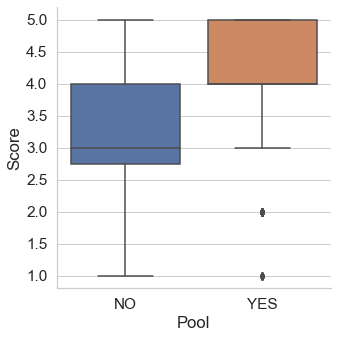

In [5]:
#setting font size and plot background
sns.set(font_scale=1.4)
sns.set_style("whitegrid")

sns.catplot(
    x="Pool",
    y="Score",
    data=reviews,
    kind="box"
);

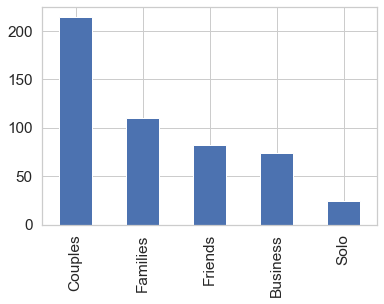

In [6]:
reviews["Traveler type"].value_counts().plot.bar();

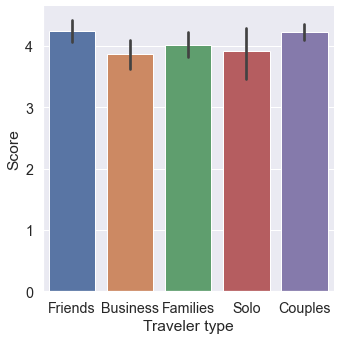

In [7]:
sns.set(font_scale=1.3)
sns.set_style("darkgrid")
sns.catplot(
    x="Traveler type",
    y="Score",
    data=reviews,
    kind="bar");

In [8]:
#ordering the categories
reviews["Traveler type"] = reviews["Traveler type"].astype('category')
reviews["Traveler type"].cat.categories

Index(['Business', 'Couples', 'Families', 'Friends', 'Solo'], dtype='object')

In [9]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   User country       504 non-null    object  
 1   Nr. reviews        504 non-null    int64   
 2   Nr. hotel reviews  504 non-null    int64   
 3   Helpful votes      504 non-null    int64   
 4   Score              504 non-null    int64   
 5   Period of stay     504 non-null    object  
 6   Traveler type      504 non-null    category
 7   Pool               504 non-null    object  
 8   Gym                504 non-null    object  
 9   Tennis court       504 non-null    object  
 10  Spa                504 non-null    object  
 11  Casino             504 non-null    object  
 12  Free internet      504 non-null    object  
 13  Hotel name         504 non-null    object  
 14  Hotel stars        504 non-null    int64   
 15  Nr. rooms          504 non-null    int64   
 16  User con